In [6]:
# %matplotlib widget

from __future__ import annotations

from collections import defaultdict
from dataclasses import dataclass, field
from itertools import product
from math import inf
from random import choice

import numpy as np

from numpy import int_, object_
from numpy.typing import NDArray

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from mpl_toolkits.mplot3d import axes3d

import re

from util import print_hex

COLORS = list(mcolors.CSS4_COLORS.keys())

<link href="style.css" rel="stylesheet"></link>
<main>
<article class="day-desc"><h2>--- Day 24: Never Tell Me The Odds ---</h2><p>It seems like something is going wrong with the snow-making process. Instead of forming snow, the water that's been absorbed into the air seems to be forming <a href="https://en.wikipedia.org/wiki/Hail" target="_blank">hail</a>!</p>
<p>Maybe there's something you can do to break up the hailstones?</p>
<p>Due to strong, probably-magical winds, the hailstones are all flying through the air in perfectly linear trajectories. You make a note of each hailstone's <em>position</em> and <em>velocity</em> (your puzzle input). For example:</p>
<pre><code>19, 13, 30 @ -2,  1, -2
18, 19, 22 @ -1, -1, -2
20, 25, 34 @ -2, -2, -4
12, 31, 28 @ -1, -2, -1
20, 19, 15 @  1, -5, -3
</code></pre>
<p>Each line of text corresponds to the position and velocity of a single hailstone. The positions indicate where the hailstones are <em>right now</em> (at time <code>0</code>). The velocities are constant and indicate exactly how far each hailstone will move in <em>one nanosecond</em>.</p>
<p>Each line of text uses the format <code>px py pz @ vx vy vz</code>. For instance, the hailstone specified by <code>20, 19, 15 @  1, -5, -3</code> has initial X position <code>20</code>, Y position <code>19</code>, Z position <code>15</code>, X velocity <code>1</code>, Y velocity <code>-5</code>, and Z velocity <code>-3</code>. After one nanosecond, the hailstone would be at <code>21, 14, 12</code>.</p>
<p>Perhaps you won't have to do anything. How likely are the hailstones to collide with each other and smash into tiny ice crystals?</p>
<p>To estimate this, consider only the X and Y axes; <em>ignore the Z axis</em>. Looking <em>forward in time</em>, how many of the hailstones' <em>paths</em> will intersect within a test area? (The hailstones themselves don't have to collide, just test for intersections between the paths they will trace.)</p>
<p>In this example, look for intersections that happen with an X and Y position each at least <code>7</code> and at most <code>27</code>; in your actual data, you'll need to check a much larger test area. Comparing all pairs of hailstones' future paths produces the following results:</p>
<pre><code>Hailstone A: 19, 13, 30 @ -2, 1, -2
Hailstone B: 18, 19, 22 @ -1, -1, -2
Hailstones' paths will cross <em>inside</em> the test area (at x=14.333, y=15.333).

Hailstone A: 19, 13, 30 @ -2, 1, -2
Hailstone B: 20, 25, 34 @ -2, -2, -4
Hailstones' paths will cross <em>inside</em> the test area (at x=11.667, y=16.667).

Hailstone A: 19, 13, 30 @ -2, 1, -2
Hailstone B: 12, 31, 28 @ -1, -2, -1
Hailstones' paths will cross outside the test area (at x=6.2, y=19.4).

Hailstone A: 19, 13, 30 @ -2, 1, -2
Hailstone B: 20, 19, 15 @ 1, -5, -3
Hailstones' paths crossed in the past for hailstone A.

Hailstone A: 18, 19, 22 @ -1, -1, -2
Hailstone B: 20, 25, 34 @ -2, -2, -4
Hailstones' paths are parallel; they never intersect.

Hailstone A: 18, 19, 22 @ -1, -1, -2
Hailstone B: 12, 31, 28 @ -1, -2, -1
Hailstones' paths will cross outside the test area (at x=-6, y=-5).

Hailstone A: 18, 19, 22 @ -1, -1, -2
Hailstone B: 20, 19, 15 @ 1, -5, -3
Hailstones' paths crossed in the past for both hailstones.

Hailstone A: 20, 25, 34 @ -2, -2, -4
Hailstone B: 12, 31, 28 @ -1, -2, -1
Hailstones' paths will cross outside the test area (at x=-2, y=3).

Hailstone A: 20, 25, 34 @ -2, -2, -4
Hailstone B: 20, 19, 15 @ 1, -5, -3
Hailstones' paths crossed in the past for hailstone B.

Hailstone A: 12, 31, 28 @ -1, -2, -1
Hailstone B: 20, 19, 15 @ 1, -5, -3
Hailstones' paths crossed in the past for both hailstones.
</code></pre>

<p>So, in this example, <code><em>2</em></code> hailstones' future paths cross inside the boundaries of the test area.</p>
<p>However, you'll need to search a much larger test area if you want to see if any hailstones might collide. Look for intersections that happen with an X and Y position each at least <code>200000000000000</code> and at most <code>400000000000000</code>. Disregard the Z axis entirely.</p>
<p>Considering only the X and Y axes, check all pairs of hailstones' future paths for intersections. <em>How many of these intersections occur within the test area?</em></p>
</article>

</main>


Hailstones (1, 1) 
HailStone(x=19, y=13, z=30, dx=-2, dy=1, dz=-2) 
HailStone(x=19, y=13, z=30, dx=-2, dy=1, dz=-2) 
None

Hailstones (1, 2) 
HailStone(x=19, y=13, z=30, dx=-2, dy=1, dz=-2) 
HailStone(x=18, y=19, z=22, dx=-1, dy=-1, dz=-2) 
(17.0, 14.0)

Hailstones (1, 3) 
HailStone(x=19, y=13, z=30, dx=-2, dy=1, dz=-2) 
HailStone(x=20, y=25, z=34, dx=-2, dy=-2, dz=-4) 
(11.0, 17.0)

Hailstones (1, 4) 
HailStone(x=19, y=13, z=30, dx=-2, dy=1, dz=-2) 
HailStone(x=12, y=31, z=28, dx=-1, dy=-2, dz=-1) 
(5.0, 20.0)

Hailstones (1, 5) 
HailStone(x=19, y=13, z=30, dx=-2, dy=1, dz=-2) 
HailStone(x=20, y=19, z=15, dx=1, dy=-5, dz=-3) 
(19.666666666666668, 12.666666666666666)

Hailstones (2, 1) 
HailStone(x=18, y=19, z=22, dx=-1, dy=-1, dz=-2) 
HailStone(x=19, y=13, z=30, dx=-2, dy=1, dz=-2) 
(17.0, 18.0)

Hailstones (2, 2) 
HailStone(x=18, y=19, z=22, dx=-1, dy=-1, dz=-2) 
HailStone(x=18, y=19, z=22, dx=-1, dy=-1, dz=-2) 
None

Hailstones (2, 3) 
HailStone(x=18, y=19, z=22, dx=-1, dy=-1, dz=-2

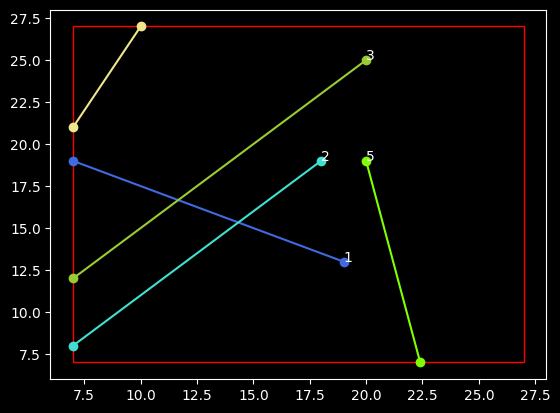

In [31]:
import enum


example = """
19, 13, 30 @ -2,  1, -2
18, 19, 22 @ -1, -1, -2
20, 25, 34 @ -2, -2, -4
12, 31, 28 @ -1, -2, -1
20, 19, 15 @  1, -5, -3
"""

DELTA = 1e-5


@dataclass(frozen=True, order=True, slots=True)
class HailStone:
    x: float
    y: float
    z: float
    dx: float
    dy: float
    dz: float
    color: str = field(
        compare=False, repr=False, default_factory=lambda: choice(COLORS)
    )

    def intersection(self, other: HailStone) -> tuple[float, float] | None:
        # parallel => m1 == m2 <=> dy1/dx1 == dy2/dx2
        if abs(self.dy / self.dx - other.dy / other.dx) < DELTA:
            return None
        # x1 + t.dx1 = x2 + t.dx2 <=> t(dx1-dx2) = x2-x1 <=> t = (x2-x1)/(dx1-dx2)
        # y1 + t.dy1 = y2 + t.dy2 <=> t(dy1-dy2) = y2-y1 <=> t = (y2-y1)/(dy1-dy2)

        t = (
            (other.x - self.x) / (self.dx - other.dx)
            if (self.dx - other.dx)
            else (other.y - self.y) / (self.dy - other.dy)
        )
        # xi = x1 + dx1(x2-x1)/(dx1-dx2)
        # yi = y1 + dy1(y2-x1)/(dy1-dy2)

        return (self.x + t * self.dx, self.y + t * self.dy)

    def begin_end_end_event(
        self, lowerbound: int, upperbound: int
    ) -> tuple[float, float]:
        # y=mx+b,x=(y-b)/m
        # b = y - mx
        # y + t*dy = bound => t = (bound - y)/dy
        # x + t*dx = bound => t = (bound - x)/dx
        m = self.dy / self.dx
        b = self.y - m * self.x
        x_for_y_upperbound = (upperbound - b) / m
        if (
            not (lowerbound <= x_for_y_upperbound <= upperbound)
            or (upperbound - self.y) / self.dy < 0
        ):
            x_for_y_upperbound = inf

        x_for_y_lowerbound = (lowerbound - b) / m
        if (
            not (lowerbound <= x_for_y_lowerbound <= upperbound)
            or (lowerbound - self.y) / self.dy < 0
        ):
            x_for_y_lowerbound = inf

        y_for_x_upperbound = m * upperbound + b
        if (
            not (lowerbound <= y_for_x_upperbound <= upperbound)
            or (upperbound - self.x) / self.dx < 0
        ):
            y_for_x_upperbound = inf

        y_for_x_lowerbound = m * lowerbound + b
        if (
            not (lowerbound <= y_for_x_lowerbound <= upperbound)
            or (lowerbound - self.x) / self.dx < 0
        ):
            y_for_x_lowerbound = inf

        points = sorted(
            (x, y)
            for x, y in (
                (x_for_y_upperbound, upperbound),
                (x_for_y_lowerbound, lowerbound),
                (upperbound, y_for_x_upperbound),
                (lowerbound, y_for_x_lowerbound),
            )
            if x < inf and y < inf
        )

        if lowerbound <= self.x <= upperbound and lowerbound <= self.y <= upperbound:
            return (self.x, self.y), points[0]
        return tuple(points)

    def plot(self, ax, lowerbound: int, upperbound: int, label: str):
        b, e = self.begin_end_end_event(lowerbound, upperbound)
        ax.plot(
            [b[0], e[0]],
            [b[1], e[1]],
            color=self.color,
            marker="o",
        )
        ax.annotate(label, (self.x, self.y))


class Plotter:
    def __init__(self, s: str) -> None:
        self.hailstones = self.parse(s)

    @classmethod
    def parse(cls, s: str) -> list[HailStone]:
        hailstones = []
        for line in s.strip().splitlines():
            pos, vel = re.split(r"\s*@\s*", line)
            x, y, z = (int(i) for i in re.split(r"\s*,\s*", pos))
            vx, vy, vz = (int(i) for i in re.split(r"\s*,\s*", vel))
            hailstones.append(HailStone(x, y, z, vx, vy, vz))
        return hailstones

    def plot(self, lowerbound: int, upperbound: int):
        _, ax = plt.subplots()
        for i, hailstone in enumerate(self.hailstones, start=1):
            hailstone.plot(ax, lowerbound, upperbound, str(i))
        d = upperbound - lowerbound
        ax.add_patch(
            Rectangle((lowerbound, lowerbound), d, d, edgecolor="red", facecolor="none")
        )
        plt.show()


pl = Plotter(example)
for (i, s), (j, o) in product(enumerate(pl.hailstones, start=1), repeat=2):
    print(f"Hailstones {i, j} \n{s} \n{o} \n{s.intersection(o)}")
    print()

pl.plot(7, 27)

In [32]:
with open("../input/day24.txt") as f:
    Plotter(f.read(), 200_000_000_000_000, 400_000_000_000_000).plot()

TypeError: Plotter.__init__() takes 2 positional arguments but 4 were given